In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from pandas import Series,DataFrame

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [16]:
rossmann_df = pd.read_csv("../train.csv",parse_dates = [2])
store_df = pd.read_csv("../store.csv")
test_df = pd.read_csv('../test.csv',parse_dates = [3])

In [17]:
test_df.head()

Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4 2015-09-17   1.0      1            0              0
1   2      3          4 2015-09-17   1.0      1            0              0
2   3      7          4 2015-09-17   1.0      1            0              0
3   4      8          4 2015-09-17   1.0      1            0              0
4   5      9          4 2015-09-17   1.0      1            0              0

In [8]:
store_df.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

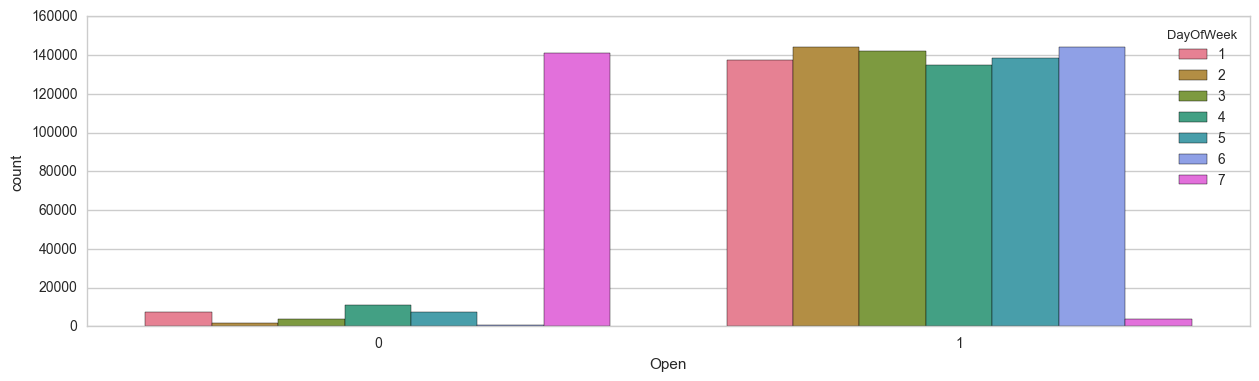

In [10]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=rossmann_df,palette="husl", ax=axis1)

In [22]:
rossmann_df['Year'] = rossmann_df.Date.dt.year
rossmann_df['Month'] = rossmann_df.Date.dt.month
test_df['Year'] = test_df.Date.dt.year
test_df['Month'] = test_df.Date.dt.month

In [23]:
rossmann_df['Date'] = rossmann_df['Date'].apply(lambda x: (str(x)[:7]))
test_df['Date']     = test_df['Date'].apply(lambda x: (str(x)[:7]))

In [25]:
average_sales = rossmann_df.groupby('Date')["Sales"].mean()
pct_change_sales = rossmann_df.groupby('Date')["Sales"].sum().pct_change()

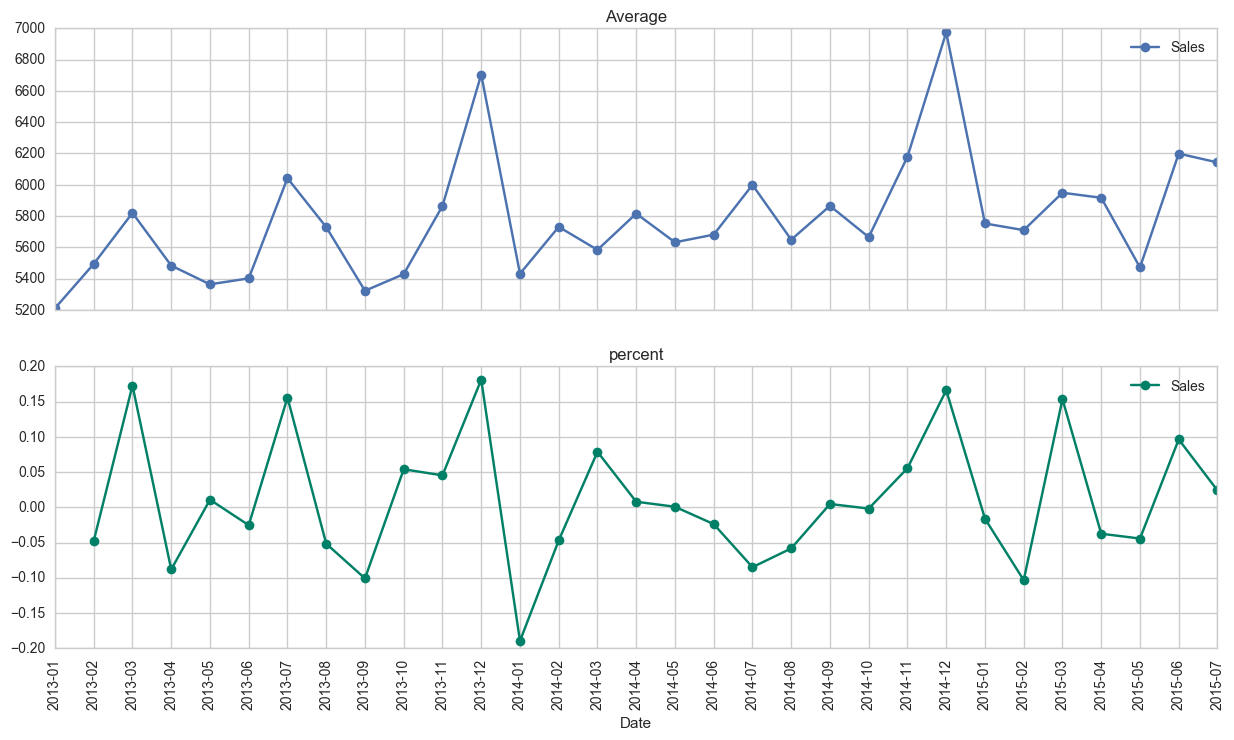

In [32]:
fig,(axis1,axis2) = plt.subplots(2,1,sharex = True,figsize = (15,8))
ax1 = average_sales.plot(legend=True,ax = axis1,marker = 'o',title = 'Average')
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist())
ax2 = pct_change_sales.plot(legend=True,ax = axis2,marker = 'o',rot = 90,colormap = "summer",title = "percent")

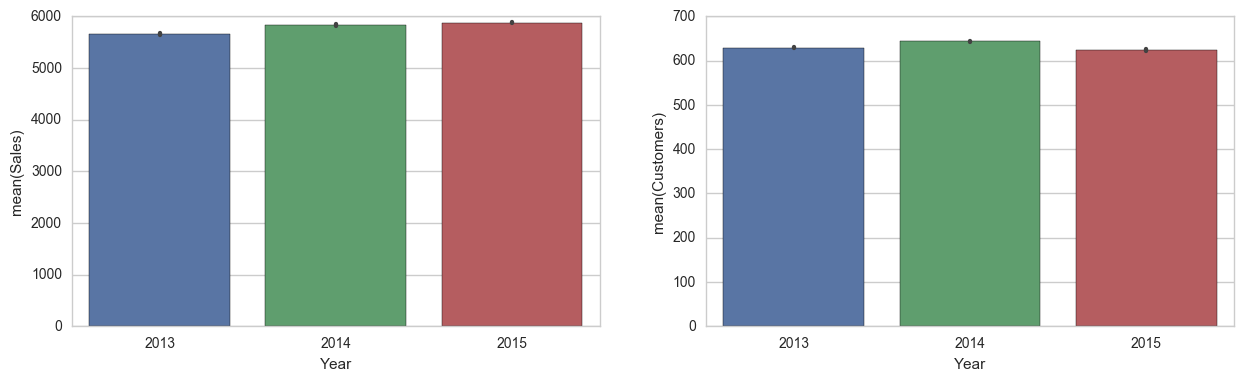

In [35]:
fig,(axis1,axis2) = plt.subplots(1,2,figsize = (15,4))
sns.barplot(x='Year',y='Sales',data = rossmann_df,ax =axis1)
sns.barplot(x ='Year',y='Customers',data = rossmann_df,ax = axis2)

In [36]:
store_piv       = pd.pivot_table(rossmann_df,values='Sales', index='Date', columns=['Store'],aggfunc='sum')
store_pct_chage = store_piv.pct_change().dropna()
store_piv.head()

Store        1         2         3         4         5         6         7     \
Date                                                                            
2013-01  128431.0  115171.0  165653.0  234713.0  109442.0  152265.0  188032.0   
2013-02  125271.0  111114.0  160167.0  230473.0  101126.0  139655.0  178830.0   
2013-03  145169.0  130525.0  189179.0  255514.0  116860.0  162550.0  213082.0   
2013-04  118009.0  116878.0  172188.0  226981.0  106141.0  154269.0  197381.0   
2013-05  118225.0  116379.0  170374.0  235284.0  110292.0  157972.0  210921.0   

Store        8         9         10      ...         1106      1107      1108  \
Date                                     ...                                    
2013-01  122293.0  127016.0  130042.0    ...     115116.0  143763.0  143571.0   
2013-02  119828.0  126826.0  122956.0    ...     107923.0  140576.0  127544.0   
2013-03  135408.0  143583.0  133609.0    ...     124035.0  170060.0  148065.0   
2013-04  127236.0  136194.0  131040.0    ...     110478.0  154915.0  132135.0   
2013-05  126886.0  136540.0  130642.0    ...     111092.0  151585.0  131119.0   

Store        1109      1110      1111      1112      1113      1114      1115  
Date                                                                           
2013-01  119190.0  106800.0  128626.0  304489.0  155879.0  456530.0  116482.0  
2013-02  115328.0   99489.0  122822.0  301544.0  147817.0  446745.0  123114.0  
2013-03  124393.0  116539.0  138298.0  312362.0  171412.0  516987.0  155033.0  
2013-04  118303.0  106745.0  131652.0  284870.0  148796.0  497336.0  126212.0  
2013-05  117329.0  105277.0  128784.0  284762.0  155649.0  503359.0  131329.0  

[5 rows x 1115 columns]

In [39]:
start_store = 1
end_store   = 5
store_piv[list(range(start_store,end_store+1))].corr()

Store         1         2         3         4         5
Store                                                  
1      1.000000  0.699159  0.722706  0.661961  0.645152
2      0.699159  1.000000  0.903864  0.796842  0.921386
3      0.722706  0.903864  1.000000  0.671759  0.905047
4      0.661961  0.796842  0.671759  1.000000  0.623425
5      0.645152  0.921386  0.905047  0.623425  1.000000

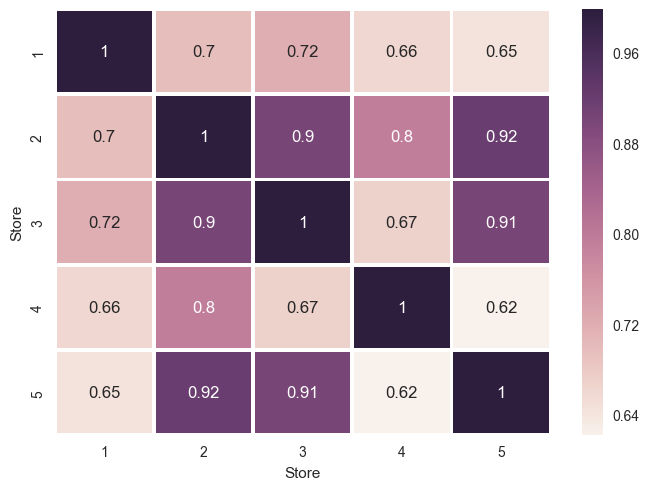

In [42]:
sns.heatmap(store_piv[list(range(start_store,end_store+1))].corr(),annot=True,linewidths =2)

In [43]:
rossmann_df.drop(["Year", "Month"], axis=1, inplace=True)
test_df.drop(["Year", "Month"], axis=1, inplace=True)

In [44]:
day_dummies_rossmann  = pd.get_dummies(rossmann_df['DayOfWeek'], prefix='Day')

In [54]:
day_dummies_rossmann

Day_1  Day_2  Day_3  Day_4  Day_5  Day_6  Day_7
0          0.0    0.0    0.0    0.0    1.0    0.0    0.0
1          0.0    0.0    0.0    0.0    1.0    0.0    0.0
2          0.0    0.0    0.0    0.0    1.0    0.0    0.0
3          0.0    0.0    0.0    0.0    1.0    0.0    0.0
4          0.0    0.0    0.0    0.0    1.0    0.0    0.0
5          0.0    0.0    0.0    0.0    1.0    0.0    0.0
6          0.0    0.0    0.0    0.0    1.0    0.0    0.0
7          0.0    0.0    0.0    0.0    1.0    0.0    0.0
8          0.0    0.0    0.0    0.0    1.0    0.0    0.0
9          0.0    0.0    0.0    0.0    1.0    0.0    0.0
10         0.0    0.0    0.0    0.0    1.0    0.0    0.0
11         0.0    0.0    0.0    0.0    1.0    0.0    0.0
12         0.0    0.0    0.0    0.0    1.0    0.0    0.0
13         0.0    0.0    0.0    0.0    1.0    0.0    0.0
14         0.0    0.0    0.0    0.0    1.0    0.0    0.0
15         0.0    0.0    0.0    0.0    1.0    0.0    0.0
16         0.0    0.0    0.0    0.0    1.0    0.0    0.0
17         0.0    0.0    0.0    0.0    1.0    0.0    0.0
18         0.0    0.0    0.0    0.0    1.0    0.0    0.0
19         0.0    0.0    0.0    0.0    1.0    0.0    0.0
20         0.0    0.0    0.0    0.0    1.0    0.0    0.0
21         0.0    0.0    0.0    0.0    1.0    0.0    0.0
22         0.0    0.0    0.0    0.0    1.0    0.0    0.0
23         0.0    0.0    0.0    0.0    1.0    0.0    0.0
24         0.0    0.0    0.0    0.0    1.0    0.0    0.0
25         0.0    0.0    0.0    0.0    1.0    0.0    0.0
26         0.0    0.0    0.0    0.0    1.0    0.0    0.0
27         0.0    0.0    0.0    0.0    1.0    0.0    0.0
28         0.0    0.0    0.0    0.0    1.0    0.0    0.0
29         0.0    0.0    0.0    0.0    1.0    0.0    0.0
...        ...    ...    ...    ...    ...    ...    ...
1017179    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017180    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017181    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017182    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017183    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017184    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017185    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017186    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017187    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017188    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017189    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017190    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017191    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017192    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017193    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017194    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017195    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017196    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017197    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017198    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017199    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017200    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017201    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017202    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017203    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017204    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017205    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017206    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017207    0.0    1.0    0.0    0.0    0.0    0.0    0.0
1017208    0.0    1.0    0.0    0.0    0.0    0.0    0.0

[1017209 rows x 7 columns]

In [55]:
day_dummies_rossmann.drop(['Day_7'], axis=1, inplace=True)

day_dummies_test  = pd.get_dummies(test_df['DayOfWeek'],prefix='Day')
day_dummies_test.drop(['Day_7'], axis=1, inplace=True)

In [56]:
rossmann_df = rossmann_df.join(day_dummies_rossmann)
test_df     = test_df.join(day_dummies_test)

rossmann_df.drop(['DayOfWeek'], axis=1,inplace=True)
test_df.drop(['DayOfWeek'], axis=1,inplace=True)

In [57]:
# remove all rows(store,date) that were closed
rossmann_df = rossmann_df[rossmann_df["Open"] != 0]

# drop unnecessary columns, these columns won't be useful in prediction
rossmann_df.drop(["Open","Customers", "Date"], axis=1, inplace=True)
# save ids of closed stores, because we will assign their sales value to 0 later(see below)
closed_store_ids = test_df["Id"][test_df["Open"] == 0].values

# remove all rows(store,date) that were closed
test_df = test_df[test_df["Open"] != 0]

# drop unnecessary columns, these columns won't be useful in prediction
test_df.drop(['Open', 'Date'], axis=1,inplace=True)

In [68]:
rossmann_df["StateHoliday"] = rossmann_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
test_df["StateHoliday"]     = test_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
rossmann_dic = dict(list(rossmann_df.groupby('Store')))
test_dic     = dict(list(test_df.groupby('Store')))
submission   = Series()
scores       = []

In [71]:
list(test_df.groupby('Store'))

[(1,
            Id  Store  Promo  StateHoliday  SchoolHoliday  Day_1  Day_2  Day_3  \
  0          1      1      1           0.0              0    0.0    0.0    0.0   
  856      857      1      1           0.0              0    0.0    0.0    1.0   
  1712    1713      1      1           0.0              0    0.0    1.0    0.0   
  2568    2569      1      1           0.0              0    1.0    0.0    0.0   
  4280    4281      1      0           0.0              0    0.0    0.0    0.0   
  5136    5137      1      0           0.0              0    0.0    0.0    0.0   
  5992    5993      1      0           0.0              0    0.0    0.0    0.0   
  6848    6849      1      0           0.0              0    0.0    0.0    1.0   
  7704    7705      1      0           0.0              0    0.0    1.0    0.0   
  8560    8561      1      0           0.0              0    1.0    0.0    0.0   
  10272  10273      1      0           0.0              0    0.0    0.0    0.0   
  11128  11

In [64]:
for i in test_dic:
    
    # current store
    store = rossmann_dic[i]
    
    # define training and testing sets
    X_train = store.drop(["Sales","Store"],axis=1)
    Y_train = store["Sales"]
    X_test  = test_dic[i].copy()
    
    store_ids = X_test["Id"]
    X_test.drop(["Id","Store"], axis=1,inplace=True)
    

    params = {"objective": "reg:linear",  "max_depth": 10}
    T_train_xgb = xgb.DMatrix(X_train, Y_train)
    X_test_xgb  = xgb.DMatrix(X_test)
    gbm = xgb.train(params, T_train_xgb, 100)
    Y_pred = gbm.predict(X_test_xgb)
    
    # append predicted values of current store to submission
    submission = submission.append(Series(Y_pred, index=store_ids))

# append rows(store,date) that were closed, and assign their sales value to 0
submission = submission.append(Series(0, index=closed_store_ids))

# save to csv file
submission = pd.DataFrame({ "Id": submission.index, "Sales": submission.values})
submission.to_csv('rossmann.csv', index=False)

Exception AttributeError: "'DMatrix' object has no attribute 'handle'" in <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x121e772d0>> ignored


KeyboardInterrupt: 